# 数据分析

In [4]:
import os
from tqdm import tqdm
import numpy as np
ad_data_path = '/root/autodl-tmp/code_pt/data/ad_data'
with open(ad_data_path, 'r') as f:
    for line in tqdm(f):
        parts = line.strip().split('\t')
        ad_id = int(parts[0])
        token_id = parts[1]
        emb = parts[2]
        emb = np.fromstring(emb, sep=',', dtype=np.float32)
        print(emb.shape)
        print(emb)  # Print first 10 elements of the embedding
        # 判断emb是否归一化
        if np.linalg.norm(emb) != 1.0:
            print(f"Embedding for ad_id {ad_id} is not normalized.")
        else:
            print(f"Embedding for ad_id {ad_id} is normalized.")
        # 将emb归一化
        if np.linalg.norm(emb) != 0:
            emb /= np.linalg.norm(emb)
        print(emb)
        break


0it [00:00, ?it/s]

(1024,)
[-2.14233e-02 -1.87378e-02  5.96000e-05 ...  7.66750e-03 -8.62880e-03
  1.58539e-02]
Embedding for ad_id 10780640767 is not normalized.
[-2.1429276e-02 -1.8743027e-02  5.9616621e-05 ...  7.6696384e-03
 -8.6312061e-03  1.5858322e-02]


In [ ]:
# 查看sequence中的ad_id在ad_data中的数量
import os
from tqdm import tqdm

ad_data_path = '/root/autodl-tmp/code_pt/data/ad_data'
ad_id_set = set()
with open(ad_data_path, 'r') as f:
    for line in tqdm(f):
        parts = line.strip().split('\t')
        ad_id = int(parts[0])
        ad_id_set.add(ad_id)

print(f"Total unique ad IDs in ad_data: {len(ad_id_set)}")

sequence_file_path = '/root/autodl-tmp/code_pt/data/train.txt'
missing_ad_ids = set()
total_ad_ids_in_sequence = 0

with open(sequence_file_path, 'r') as f:
    for line in tqdm(f):
        parts = line.strip().split('\t')
        ad_ids = list(map(int, parts[1].split(',')))
        total_ad_ids_in_sequence += len(ad_ids)

In [4]:
# 统计广告数据的总数
ad_count = 0
with open(ad_data_path, 'r') as f:
    for line in tqdm(f):
        ad_count += 1

print(f"Total number of ads: {ad_count}")

1307221it [01:01, 21265.52it/s]

Total number of ads: 1307221


In [6]:
sequence_data_path = '/root/autodl-tmp/code_pt/data/sequence_data'
with open(sequence_data_path, 'r') as f:
    for line in tqdm(f):
        parts = line.strip().split('\t')
        user_id = parts[0]
        sequence = parts[1]
        print(f"User ID: {user_id}, Sequence: {sequence}...")
        break

0it [00:00, ?it/s]

User ID: 0000CD80F6AB2AD62A296F788E11E37E, Sequence: 10860887704 10885081470 10736791879 10870720145 10874033718 10758950260...


In [7]:
# 统计用户总数
user_count = 0
with open(sequence_data_path, 'r') as f:
    for line in tqdm(f):
        user_count += 1

print(f"Total number of users: {user_count}")

500000it [00:00, 1115457.73it/s]

Total number of users: 500000


500000it [00:01, 361106.25it/s]


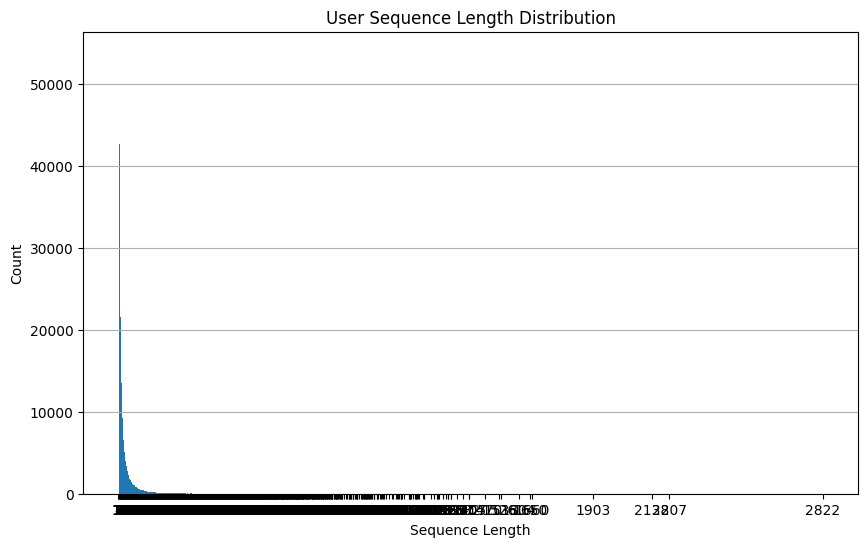

In [8]:
# 统计用户序列的长度分布
lengths = []
with open(sequence_data_path, 'r') as f:
    for line in tqdm(f):
        parts = line.strip().split('\t')
        sequence = parts[1]
        lengths.append(len(sequence.split()))

length_counts = {}
for length in lengths:
    if length not in length_counts:
        length_counts[length] = 0
    length_counts[length] += 1

# 画图显示长度分布
import matplotlib.pyplot as plt

lengths_sorted = sorted(length_counts.keys())
counts_sorted = [length_counts[length] for length in lengths_sorted]

plt.figure(figsize=(10, 6))
plt.bar(lengths_sorted, counts_sorted)
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('User Sequence Length Distribution')
plt.xticks(lengths_sorted)
plt.grid(axis='y')
plt.show()

In [10]:
# 查看序列最长的用户
max_length = max(lengths)
print(f"Longest user sequence length: {max_length}")
# 查看最短的序列长度
min_length = min(lengths)
print(f"Shortest user sequence length: {min_length}")

Longest user sequence length: 2822
Shortest user sequence length: 3


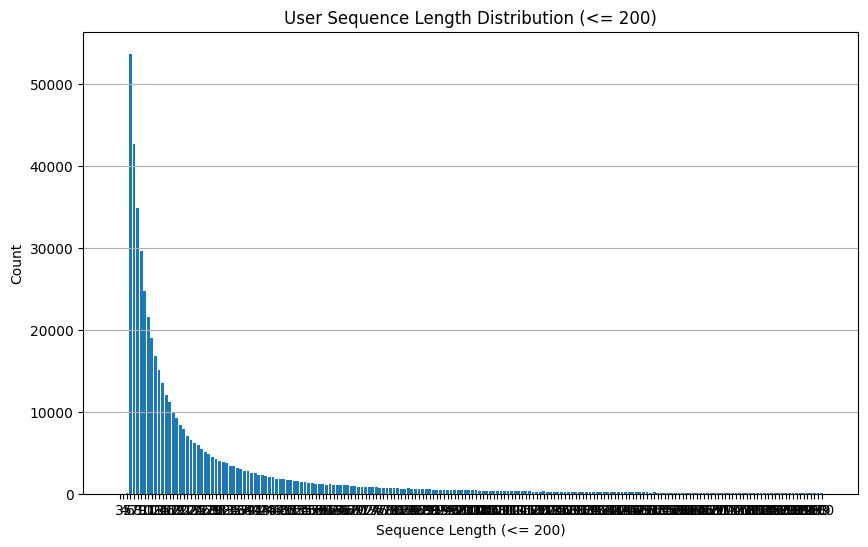

In [11]:
# 查看序列长度在200以内的用户分布
lengths_within_200 = [length for length in lengths if length <= 200]
lengths_within_200_counts = {}
for length in lengths_within_200:
    if length not in lengths_within_200_counts:
        lengths_within_200_counts[length] = 0
    lengths_within_200_counts[length] += 1

lengths_within_200_sorted = sorted(lengths_within_200_counts.keys())
counts_within_200_sorted = [lengths_within_200_counts[length] for length in lengths_within_200_sorted]

plt.figure(figsize=(10, 6))
plt.bar(lengths_within_200_sorted, counts_within_200_sorted)
plt.xlabel('Sequence Length (<= 200)')
plt.ylabel('Count')
plt.title('User Sequence Length Distribution (<= 200)')
plt.xticks(lengths_within_200_sorted)
plt.grid(axis='y')
plt.show()
# --- IGNORE ---

In [12]:
# 查看平均序列长度
average_length = sum(lengths) / len(lengths)
print(f"Average user sequence length: {average_length:.2f}")

Average user sequence length: 29.26


# 训练集测试集划分

In [ ]:
# 将用户划分为训练集和测试集 9:1
import random

random.seed(42)
def split_dataset(sequence_data_path, train_ratio=0.9):
    with open(sequence_data_path, 'r') as f:
        lines = f.readlines()
    
    random.shuffle(lines)
    split_index = int(len(lines) * train_ratio)
    
    train_data = lines[:split_index]
    test_data = lines[split_index:]
    
    return train_data, test_data

train_data, test_data = split_dataset(sequence_data_path)
# 保存训练集和测试集
train_file_path = '/root/autodl-tmp/code_pt/data/train.txt'
test_file_path = '/root/autodl-tmp/code_pt/data/test.txt'

with open(train_file_path, 'w') as f:
    f.writelines(train_data)

with open(test_file_path, 'w') as f:
    f.writelines(test_data)

print(f"Training data saved to {train_file_path}")
print(f"Testing data saved to {test_file_path}")

Training data saved to /root/autodl-tmp/code_pt/data/train.txt
Testing data saved to /root/autodl-tmp/code_pt/data/test.txt


# dataset

In [ ]:
# 把 project/ 放进 sys.path
import sys
from pathlib import Path

# notebook 位于 project/scripts 下，所以根目录是父目录
ROOT = Path.cwd().parent
sys.path.insert(0, str(ROOT))

# 现在就能导入 src 里的模块了
from src.datasets import TrainDataset, TestDataset

import os
# current_dir = os.path.dirname(__file__)
# paretn_dir = os.path.dirname(current_dir)
parent_dir = '/root/autodl-tmp/code_pt'

dataset_dir = os.path.join(parent_dir, "data")
train_file = "train.txt"
test_file = "test.txt"
ads_info_file = "ad_data"
maxlen = 10
emb_dim = 1024

class Args:
    dataset_dir = dataset_dir
    train_file = train_file
    test_file = test_file
    ads_info_file = ads_info_file
    maxlen = maxlen
    emb_dim = emb_dim

args = Args()
train_dataset = TrainDataset(args)
test_dataset = TestDataset(args)

NameError: name '__file__' is not defined

# 构建向量数据库检索

In [5]:
import os
# 读取ad_data的第一行
ad_data_file = '/root/autodl-tmp/code_pt/data/ad_data'
with open(ad_data_file, 'r') as f:
    first_line = f.readline().strip()
    print(f"First line of ad_data: {first_line}")


First line of ad_data: 10780640767	1,897,34,384,5,16,29,299,38,34,737,15,4,532,525,525,47,27,58,72,4,7,27,136,52,244,16,332,958,12044,2	-0.0214233,-0.0187378,0.0000596,-0.0523376,0.0162354,-0.0253601,0.0515442,0.0293274,-0.0141220,-0.0238037,-0.0007772,0.0210419,-0.0371704,-0.0195618,-0.0009294,0.0402222,-0.0178528,-0.0038929,0.0431824,-0.0244598,0.0061264,-0.0128250,-0.0325623,0.0109711,-0.0182648,-0.0264740,-0.0014095,-0.0459900,0.0187836,0.0362854,-0.0557251,-0.0062103,-0.0390015,0.1035767,0.0171967,-0.0134201,-0.0024300,0.0184479,0.0300751,-0.0031738,-0.0182037,-0.0026245,-0.0484619,0.0204773,0.0180817,0.0265198,-0.0001696,0.0051422,0.0200500,0.0435791,-0.0315247,0.0403137,0.0063744,-0.0518494,-0.0102081,-0.0015736,0.0174408,-0.0045052,-0.0503235,-0.0263519,-0.0066566,0.0612488,0.0607605,-0.0397034,-0.0256500,0.0225220,0.0023708,-0.0282440,-0.0030308,-0.0681763,-0.0181427,0.0116348,-0.0185089,-0.0386658,0.0349426,-0.0324402,0.0006871,0.0278931,-0.0458984,0.0189514,0.0288849,-0.0029

In [6]:
# 读取sequence_data的第一行
sequence_data_file = '/root/autodl-tmp/code_pt/data/sequence_data'
with open(sequence_data_file, 'r') as f:
    first_line = f.readline().strip()
    print(f"First line of sequence_data: {first_line}")

First line of sequence_data: 0000CD80F6AB2AD62A296F788E11E37E	10860887704 10885081470 10736791879 10870720145 10874033718 10758950260


In [8]:
from tqdm import tqdm
# 读取sequnce_data，将历史点击广告id中不在ad_data中的广告id删除，并找到广告id对应的embedding，保存到新的文件中
ad_data_file = '/root/autodl-tmp/code_pt/data/ad_data'
sequence_data_file = '/root/autodl-tmp/code_pt/data/sequence_data'
output_file = '/root/autodl-tmp/code_pt/data/processed_sequence_data'
ad_id_to_emb = {}
with open(ad_data_file, 'r') as f:
    for line in tqdm(f):
        parts = line.strip().split('\t')
        ad_id = int(parts[0])
        emb = parts[2]
        ad_id_to_emb[ad_id] = emb
        # break  # 只读取第一行，测试用
print(f"Total ads loaded: {len(ad_id_to_emb)}")
print(f"Sample ad_id to emb: {list(ad_id_to_emb.items())[:5]}")  # 打印前5个映射


1307221it [01:15, 17411.83it/s]


Total ads loaded: 1307221
Sample ad_id to emb: [(10780640767, '-0.0214233,-0.0187378,0.0000596,-0.0523376,0.0162354,-0.0253601,0.0515442,0.0293274,-0.0141220,-0.0238037,-0.0007772,0.0210419,-0.0371704,-0.0195618,-0.0009294,0.0402222,-0.0178528,-0.0038929,0.0431824,-0.0244598,0.0061264,-0.0128250,-0.0325623,0.0109711,-0.0182648,-0.0264740,-0.0014095,-0.0459900,0.0187836,0.0362854,-0.0557251,-0.0062103,-0.0390015,0.1035767,0.0171967,-0.0134201,-0.0024300,0.0184479,0.0300751,-0.0031738,-0.0182037,-0.0026245,-0.0484619,0.0204773,0.0180817,0.0265198,-0.0001696,0.0051422,0.0200500,0.0435791,-0.0315247,0.0403137,0.0063744,-0.0518494,-0.0102081,-0.0015736,0.0174408,-0.0045052,-0.0503235,-0.0263519,-0.0066566,0.0612488,0.0607605,-0.0397034,-0.0256500,0.0225220,0.0023708,-0.0282440,-0.0030308,-0.0681763,-0.0181427,0.0116348,-0.0185089,-0.0386658,0.0349426,-0.0324402,0.0006871,0.0278931,-0.0458984,0.0189514,0.0288849,-0.0029831,0.0143967,0.0400696,0.0079498,-0.0009704,-0.0354004,0.3764648,0.03155

In [ ]:
# 读取sequnce_data，将历史点击广告id中不在ad_data中的广告id删除，并找到广告id对应的embedding，保存到新的文件中
import json
ad_data_file = '/root/autodl-tmp/code_pt/data/ad_data'
sequence_data_file = '/root/autodl-tmp/code_pt/data/sequence_data'
output_file = '/root/autodl-tmp/code_pt/data/processed_sequence_data.json'   

with open(sequence_data_file, 'r') as fin, open(output_file, 'w') as fout:
    for line in tqdm(fin):
        parts = line.strip().split('\t')
        # user_id = parts[0]
        ad_ids = list(map(int, parts[1].split(' ')))
        
        # 过滤掉不在ad_data中的广告id
        filtered_ad_ids = [ad_id for ad_id in ad_ids if ad_id in ad_id_to_emb]
        
        # 获取对应的embedding
        embeddings = [ad_id_to_emb[ad_id] for ad_id in filtered_ad_ids]
        
        # 以json格式保存到新文件
        if embeddings:  # 确保不为空
            fout.write(json.dumps(embeddings) + '\n')
        break  # 只处理第一行，测试用
        
print(f"Processed sequence data saved to {output_file}")

0it [00:00, ?it/s]

Processed sequence data saved to /root/autodl-tmp/code_pt/data/processed_sequence_data.json


: 